In [1]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# from plotly import graph_objs as go
# import plotly.express as px
# import plotly.figure_factory as ff
from collections import Counter

# from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# from tqdm import tqdm
import os
# import nltk
import random
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("preposes\sentiment_analysis_data_seimbang.csv")

In [9]:
df.head()

,Comment,cleaned,tokenized,normalized,sentiment,score
0,Terima kasih sudah mencerdaskan bangsa dengan ...,terima kasih mencerdaskan bangsa data fakta,"['terima', 'kasih', 'mencerdaskan', 'bangsa', ...",terima kasih mencerdaskan bangsa data fakta,positive,0.953096
1,Iya bener,iya bener,"['iya', 'bener']",iya benar,positive,0.778663
2,Emng boleh seoercaya itu,emng seoercaya,"['emng', 'seoercaya']",memang seoercaya,positive,0.991190
3,Ga ada bagusnya...🙉...yg di wawancara ga berkelas,bagusnya wawancara berkelas,"['bagusnya', 'wawancara', 'berkelas']",bagusnya wawancara berkelas,positive,0.993296
4,Denger gibahan ini mah.. ngga banget.. fokus a...,denger gibahan mah ngga banget fokus memperbai...,"['denger', 'gibahan', 'mah', 'ngga', 'banget',...",dengar gibahan mah enggak banget fokus memperb...,positive,0.729036


In [13]:
data = df[['Comment', "tokenized","normalized", "sentiment", "score"]]
data["label"] = df["sentiment"].map({"positive": 2, "neutral": 1, "negative": 0})

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Comment     36000 non-null  object 
 1   tokenized   36000 non-null  object 
 2   normalized  36000 non-null  object 
 3   sentiment   36000 non-null  object 
 4   score       36000 non-null  float64
 5   label       36000 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.6+ MB


In [15]:
data.head()

,Comment,tokenized,normalized,sentiment,score,label
0,Terima kasih sudah mencerdaskan bangsa dengan ...,"['terima', 'kasih', 'mencerdaskan', 'bangsa', ...",terima kasih mencerdaskan bangsa data fakta,positive,0.953096,2
1,Iya bener,"['iya', 'bener']",iya benar,positive,0.778663,2
2,Emng boleh seoercaya itu,"['emng', 'seoercaya']",memang seoercaya,positive,0.991190,2
3,Ga ada bagusnya...🙉...yg di wawancara ga berkelas,"['bagusnya', 'wawancara', 'berkelas']",bagusnya wawancara berkelas,positive,0.993296,2
4,Denger gibahan ini mah.. ngga banget.. fokus a...,"['denger', 'gibahan', 'mah', 'ngga', 'banget',...",dengar gibahan mah enggak banget fokus memperb...,positive,0.729036,2


In [16]:
with open('stopwords.txt', 'r') as file:
    stopwords = file.read().splitlines()
print(type(stopwords))

<class 'list'>


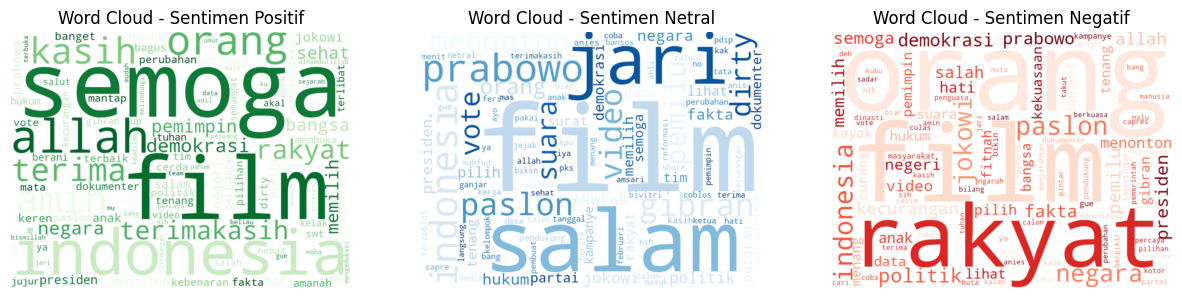

Jumlah kata 'tidak' dalam sentimen positif: 961
Jumlah kata 'tidak' dalam sentimen netral: 574
Jumlah kata 'tidak' dalam sentimen negatif: 1636


In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

def kemunculanKata(df, kata, stop_words, language='indonesian'):
    stop_words = set(stopwords.words(language))
    
    def hitung_jumlah_kata(sentimen, kata):
        return sum(1 for tokens in df[df['sentiment'] == sentimen]['tokenized'] if kata in tokens)
    
    wordcloud_positive = WordCloud(width=800, height=600,
                                background_color='white',
                                max_words=100,
                                colormap='Greens',  
                                stopwords=stop_words,
                                collocations=False).generate(' '.join(df[df['sentiment'] == 'positive']['normalized']))
    
    wordcloud_neutral = WordCloud(width=800, height=600,
                                background_color='white',
                                max_words=100,
                                colormap='Blues',  
                                stopwords=stop_words,
                                collocations=False).generate(' '.join(df[df['sentiment'] == 'neutral']['normalized']))
    
    wordcloud_negative = WordCloud(width=800, height=600,
                                background_color='white',
                                max_words=100,
                                colormap='Reds', 
                                stopwords=stop_words,
                                collocations=False).generate(' '.join(df[df['sentiment'] == 'negative']['normalized']))


    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.title('Word Cloud - Sentimen Positif')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(wordcloud_neutral, interpolation='bilinear')
    plt.title('Word Cloud - Sentimen Netral')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.title('Word Cloud - Sentimen Negatif')
    plt.axis('off')
    plt.show()
    
    jumlah_kata_positif = hitung_jumlah_kata('positive', kata)
    jumlah_kata_neutral = hitung_jumlah_kata('neutral', kata)
    jumlah_kata_negatif = hitung_jumlah_kata('negative', kata)
    
    print(f"Jumlah kata '{kata}' dalam sentimen positif: {jumlah_kata_positif}")
    print(f"Jumlah kata '{kata}' dalam sentimen netral: {jumlah_kata_neutral}")
    print(f"Jumlah kata '{kata}' dalam sentimen negatif: {jumlah_kata_negatif}")

# Example usage:
kemunculanKata(data, 'tidak', stopwords)


In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
import pandas as pd

data = pd.read_csv("preposes\sentiment_analysis_data_seimbang.csv")
data = data[["normalized", "sentiment"]]

In [19]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data["normalized"])

In [ ]:
X.toarray()

In [30]:
from sklearn.preprocessing import LabelEncoder

y = data["sentiment"]
le = LabelEncoder()
y = le.fit_transform(y)

In [31]:
features, labels = X, y

In [50]:
svm = SVC(kernel='linear', C=3)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=7)
kf = KFold(n_splits=5, shuffle=True, random_state=42) 
accuracies = []
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    svm.fit(X_train_fold, y_train_fold)
    predictions = svm.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, predictions)
    accuracies.append(accuracy)
    print("Akurasi validasi set:", accuracy)

final_svm = SVC() 
final_svm.fit(X_train, y_train)
predictions = final_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
print("Akurasi test set:", test_accuracy)
print("Rata-rata akurasi semua folds:", sum(accuracies) / len(accuracies))

Akurasi validasi set: 0.7199074074074074
Akurasi validasi set: 0.7201388888888889
Akurasi validasi set: 0.7226851851851852
Akurasi validasi set: 0.7247685185185185
Akurasi validasi set: 0.7256944444444444
Akurasi test set: 0.7402083333333334
Rata-rata akurasi semua folds: 0.7226388888888888


In [52]:
print(classification_report(y_test, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

    negative       0.75      0.72      0.73      4884
     neutral       0.69      0.78      0.73      4827
    positive       0.80      0.72      0.76      4689

    accuracy                           0.74     14400
   macro avg       0.75      0.74      0.74     14400
weighted avg       0.74      0.74      0.74     14400



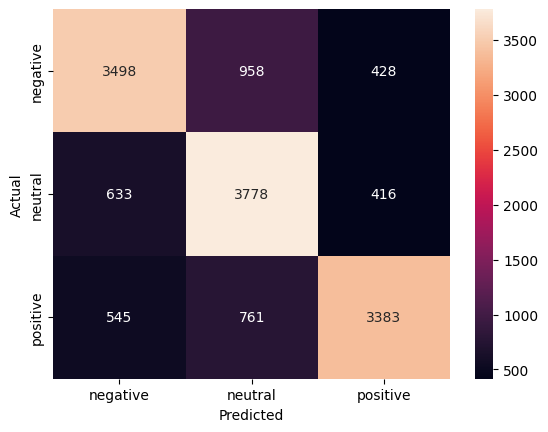

In [54]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [3]:
final_svm = SVC(kernel='linear')

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
import pickle
pickle.dump(final_svm, open('final_svm_model.pkl', 'wb'))
pickle.dump(le, open('label_encoder.pkl', 'wb'))

In [9]:
with open('stopwords.txt', 'r') as file:
    stopwords = file.read().splitlines()
print(type(stopwords))

<class 'list'>


In [12]:
import re

In [10]:
def preprocess(text):
    text = re.sub(r'[^\w\s-]', ' ', text)
    text = text.encode('ascii','ignore').decode('utf-8')
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    text = re.sub(r'[^\w\s]','',text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stopwords]
    text = ' '.join(text)
    return text

In [14]:
tfidf = TfidfVectorizer()

In [20]:
def predict_sentiment(text):
    text = preprocess(text)
    text = tfidf.transform([text])
    prediction = final_svm.predict(text)
    prediction = le.inverse_transform(prediction)[0]
    return prediction

print(predict_sentiment("halo"))

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.